### **This notebook contains multiple linear regression practice with vehicle emission dataset** 

In [2]:
import numpy as np
import pandas as pd 

In [3]:
df= pd.read_csv(r"C:\Users\Karth\Downloads\Machine learning\Datasets\co2.csv")
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
df.shape

(7385, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

-  Here too many columns are not useful for predicting co2 emission I should drop them !

In [6]:
df.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

In [7]:
df1= df.drop(columns=['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Consumption Comb (mpg)'])
df1

,Engine Size(L),Cylinders,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
0,2.0,4,Z,9.9,6.7,8.5,196
1,2.4,4,Z,11.2,7.7,9.6,221
2,1.5,4,Z,6.0,5.8,5.9,136
3,3.5,6,Z,12.7,9.1,11.1,255
4,3.5,6,Z,12.1,8.7,10.6,244
...,...,...,...,...,...,...,...
7380,2.0,4,Z,10.7,7.7,9.4,219
7381,2.0,4,Z,11.2,8.3,9.9,232
7382,2.0,4,Z,11.7,8.6,10.3,240
7383,2.0,4,Z,11.2,8.3,9.9,232


In [8]:
df1.isnull().sum()

Engine Size(L)                      0
Cylinders                           0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
CO2 Emissions(g/km)                 0
dtype: int64

In [9]:
df1.duplicated().sum()

np.int64(2958)

In [10]:
df2= df1.drop_duplicates()
df2.shape

(4427, 7)

In [11]:
df2['Fuel Type'].unique()

array(['Z', 'D', 'X', 'E', 'N'], dtype=object)

In [12]:
df3= pd.get_dummies(df2, columns=['Fuel Type'], drop_first=True,  dtype=int)
df3

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km),Fuel Type_E,Fuel Type_N,Fuel Type_X,Fuel Type_Z
0,2.0,4,9.9,6.7,8.5,196,0,0,0,1
1,2.4,4,11.2,7.7,9.6,221,0,0,0,1
2,1.5,4,6.0,5.8,5.9,136,0,0,0,1
3,3.5,6,12.7,9.1,11.1,255,0,0,0,1
4,3.5,6,12.1,8.7,10.6,244,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
7375,2.0,4,11.3,7.5,9.6,223,0,0,0,1
7379,2.0,4,10.2,7.5,9.0,210,0,0,1,0
7380,2.0,4,10.7,7.7,9.4,219,0,0,0,1
7382,2.0,4,11.7,8.6,10.3,240,0,0,0,1


**Univariate Analysis**

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns 

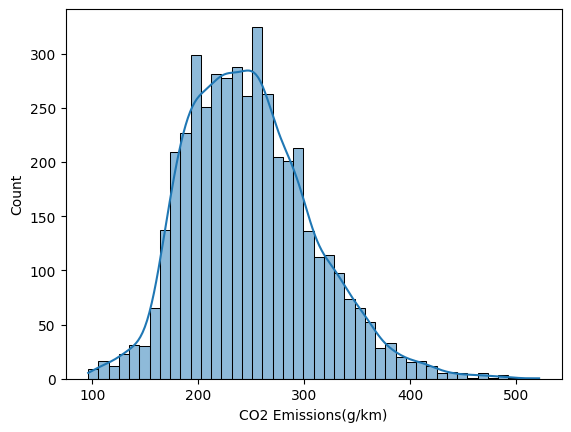

In [14]:
sns.histplot(df3['CO2 Emissions(g/km)'], kde=True, )
plt.show()

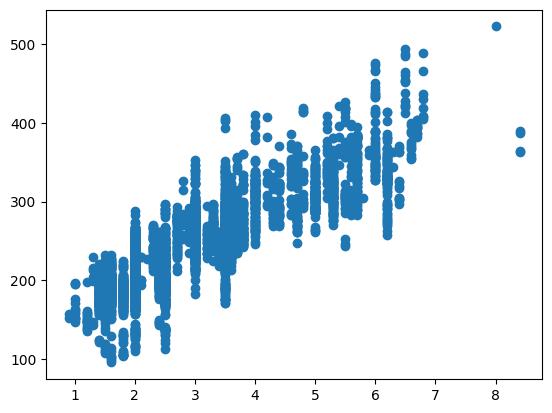

In [15]:
plt.scatter(x='Engine Size(L)', y='CO2 Emissions(g/km)', data=df3)
plt.show()

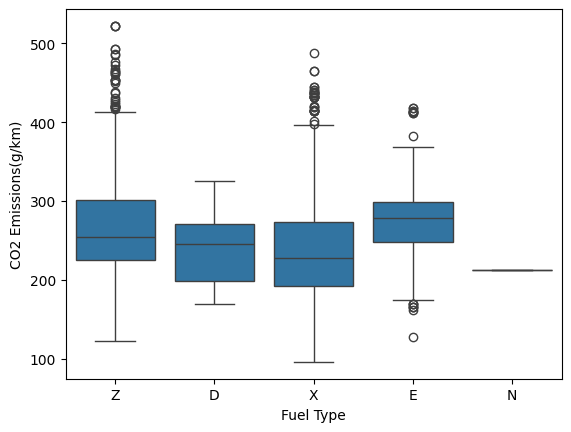

In [16]:
sns.boxplot(x='Fuel Type', y='CO2 Emissions(g/km)', data=df)
plt.show()

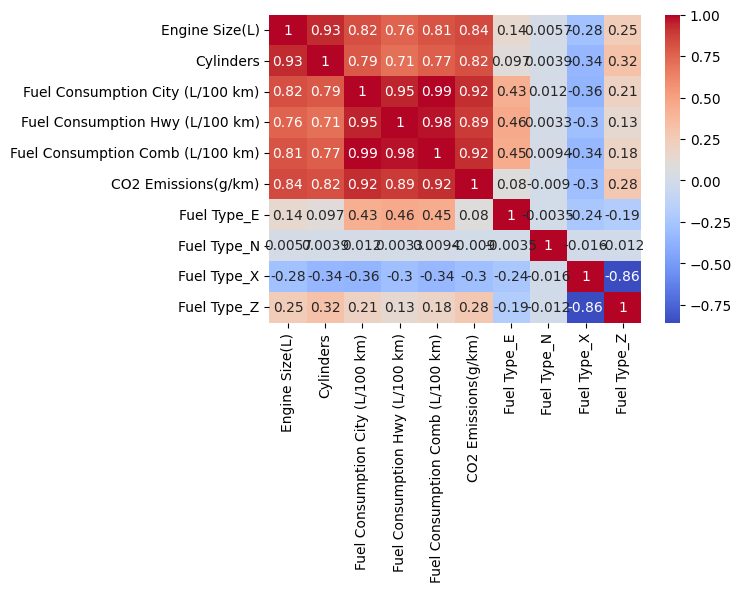

In [17]:
plt.figure(figsize=(6,4))
sns.heatmap(df3.corr(), annot= True, cmap='coolwarm')
plt.show()

- From this heatmap we can understand that Fuel consumption city, hwy and comb are almost same 0.95 (average)
- So I am going to take only fuel consumption comb for model building

In [18]:
X = df3[['Engine Size(L)', 'Cylinders', 'Fuel Consumption Comb (L/100 km)', 'Fuel Type_E', 'Fuel Type_N', 'Fuel Type_X', 'Fuel Type_Z']]

y = df3['CO2 Emissions(g/km)']

In [19]:
print(X.shape)
print(y.shape)

(4427, 7)
(4427,)


**Train test split**

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(3541, 7) (3541,)
(886, 7) (886,)


In [21]:
from sklearn.linear_model import LinearRegression

model= LinearRegression()

model.fit(X_train, y_train)


LinearRegression()

In [22]:
print("Coeffecients (Weights): ", model.coef_)
print("Interception (Bias): ", model.intercept_)

Coeffecients (Weights):  [   0.19396546    0.47411954   22.4318284  -138.73110046 -111.47841613
  -30.21661817  -29.83557592]
Interception (Bias):  36.05120251842797


**Make Predictions on the test set**

In [25]:
y_pred= model.predict(X_test)


print("Actual Co2 Emmissions: ", y_test[:10].values)
print("Predicted Co2 Emmissions: ", y_pred[:10])

Actual Co2 Emmissions:  [202 278 249 255 200 264 262 183 362 251]
Predicted Co2 Emmissions:  [205.51908337 280.80270092 247.15495832 254.14916981 203.35348672
 267.2272246  259.35547153 183.1842377  409.10039722 252.62592301]


**Model Evaluation**

In [27]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

R2= r2_score(y_test, y_pred)

mse= mean_squared_error(y_test, y_pred)

mae= mean_absolute_error(y_test, y_pred)

rmse= np.sqrt(mse)

print(f"R2 Score: {R2}")
print(f"Mean Squared Error is: {mse}")
print("Mean Absolute Error: ", mae)
print("Root Mean Squared Error: ", rmse)

R2 Score: 0.990858071124294
Mean Squared Error is: 35.892858228437724
Mean Absolute Error:  3.2538689655845157
Root Mean Squared Error:  5.991064865984821


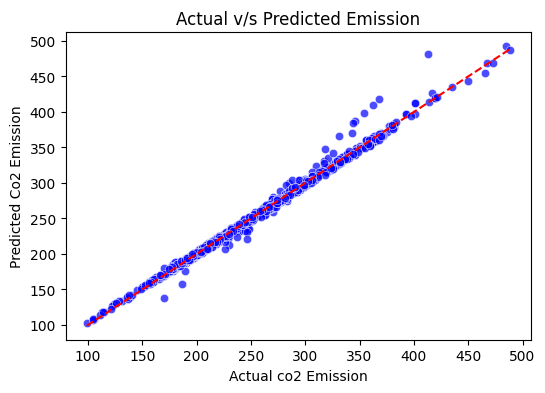

In [30]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle="--")
plt.xlabel("Actual co2 Emission")
plt.ylabel("Predicted Co2 Emission")
plt.title("Actual v/s Predicted Emission")
plt.show()

**New Data Prediction**

In [31]:
df3.columns

Index(['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'CO2 Emissions(g/km)', 'Fuel Type_E', 'Fuel Type_N', 'Fuel Type_X',
       'Fuel Type_Z'],
      dtype='object')

In [33]:
new_data= pd.DataFrame({
    'Engine Size(L)': [3.5], 'Cylinders':[6], 'Fuel Consumption Comb (L/100 km)': [9], 'Fuel Type_E':[0], 'Fuel Type_N': [0], 'Fuel Type_X':[1], 'Fuel Type_Z': [0] 
})

new_prediction= model.predict(new_data)
print("The co2 Emission is: ", new_prediction[0])

The co2 Emission is:  211.2446363274024


In [35]:
import joblib
joblib.dump(model, 'Multi_Linear.pkl')

['Multi_Linear.pkl']